In [1]:
import os
import zipfile
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.preprocessing import image
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import os, signal

Using TensorFlow backend.


In [2]:
base_dir = 'Retinal'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

train_cats_dir = os.path.join(train_dir, 'AMD')
train_dogs_dir = os.path.join(train_dir, 'NonAMD')

validation_cats_dir = os.path.join(validation_dir, 'AMD')
validation_dogs_dir = os.path.join(validation_dir, 'NonAMD')


In [3]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

print('total training cat images :', len(os.listdir(train_cats_dir ) ))
print('total training dog images :', len(os.listdir(train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))



['A0018.jpg', 'A0020.jpg', 'A0054.jpg', 'A0060.jpg', 'A0012.jpg', 'A0042.jpg', 'A0040.jpg', 'A0010.jpg', 'A0034.jpg', 'A0021.jpg']
['N0088.jpg', 'N0033.jpg', 'N0035.jpg', 'N0020.jpg', 'N0015.jpg', 'N0031.jpg', 'N0037.jpg', 'N0080.jpg', 'N0038.jpg', 'N0023.jpg']
total training cat images : 60
total training dog images : 100
total validation cat images : 60
total validation dog images : 100


In [4]:
nrows = 4
ncols = 4
pic_index = 0

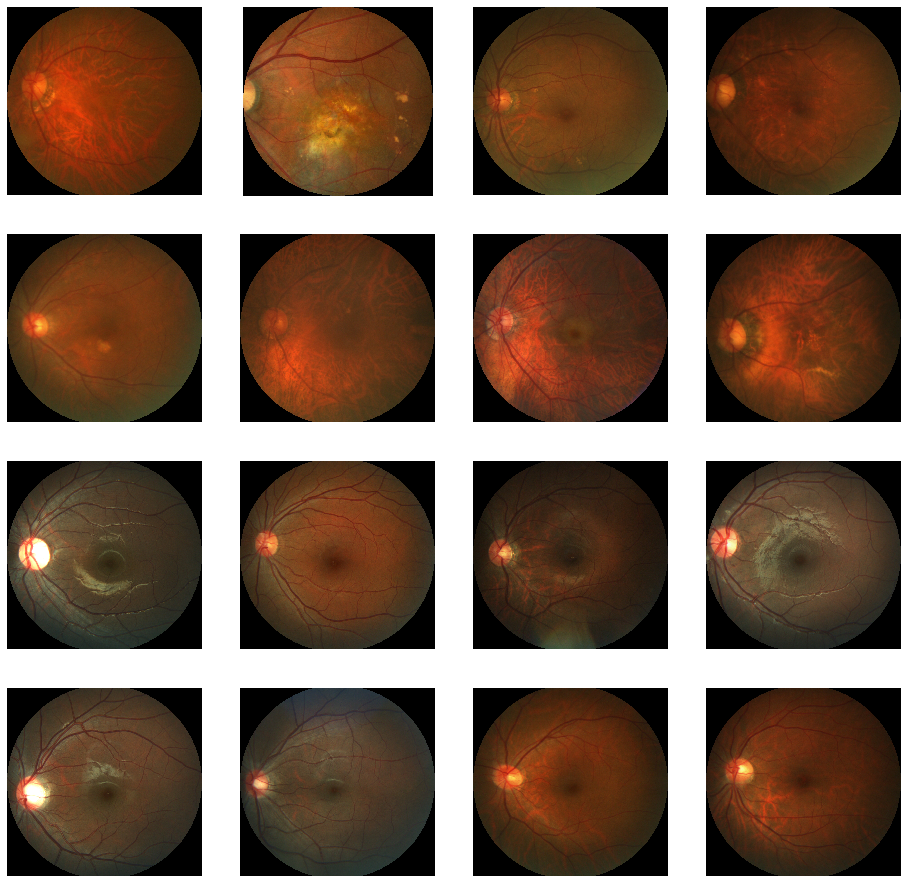

In [5]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index+=8
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index]]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') 
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0         
__________

In [8]:
model.compile(optimizer=RMSprop(lr=0.001),loss='binary_crossentropy',metrics = ['acc'])

In [10]:
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     

validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 160 images belonging to 2 classes.
Found 160 images belonging to 2 classes.


In [11]:
#train model
history = model.fit_generator(train_generator, validation_data=validation_generator,
                              steps_per_epoch=100,epochs=15, validation_steps=50, verbose=1)

Epoch 1/15
100/100 [==============================] - 216s 2s/step - loss: 0.6115 - acc: 0.6940 - val_loss: 0.4250 - val_acc: 0.7910
Epoch 2/15
100/100 [==============================] - 204s 2s/step - loss: 0.3293 - acc: 0.8565 - val_loss: 0.4215 - val_acc: 0.7850
Epoch 3/15
100/100 [==============================] - 198s 2s/step - loss: 0.1530 - acc: 0.9405 - val_loss: 0.0299 - val_acc: 1.0000
Epoch 4/15
100/100 [==============================] - 201s 2s/step - loss: 0.0546 - acc: 0.9845 - val_loss: 0.0022 - val_acc: 1.0000
Epoch 5/15
100/100 [==============================] - 191s 2s/step - loss: 0.0391 - acc: 0.9920 - val_loss: 3.5251e-04 - val_acc: 1.0000
Epoch 6/15
100/100 [==============================] - 205s 2s/step - loss: 0.0376 - acc: 0.9945 - val_loss: 1.2390e-04 - val_acc: 1.0000
Epoch 7/15
100/100 [==============================] - 192s 2s/step - loss: 0.0362 - acc: 0.9950 - val_loss: 1.4543e-04 - val_acc: 1.0000
Epoch 8/15
100/100 [==============================] - 197

In [27]:
#model summury
model.save('amdnamd2.h5')

In [35]:
#features map
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]

In [36]:
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  
x= img_to_array(img)                          
x= x.reshape((1,) + x.shape)
x/= 255.0

/home/nebex/usys/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


IndexError: too many indices for array

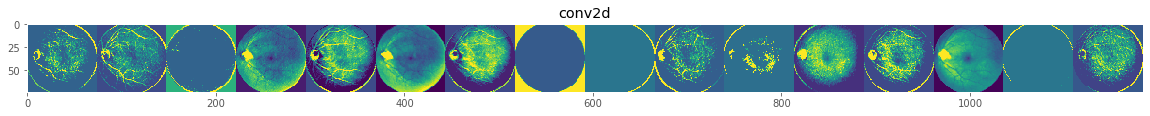

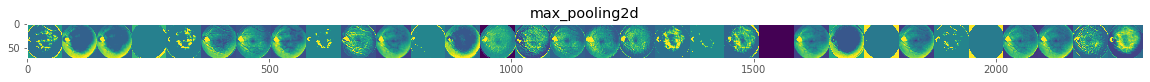

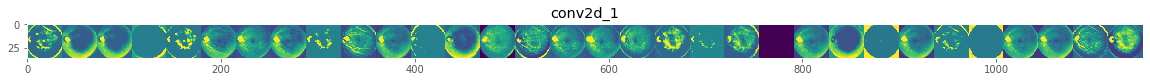

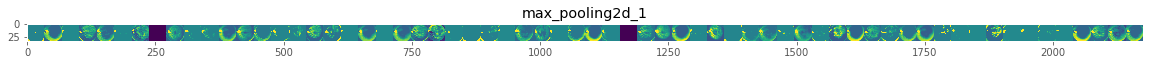

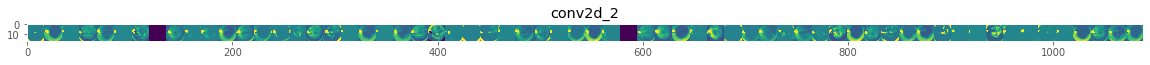

In [37]:
successive_feature_maps = visualization_model.predict(x)
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        n_features = feature_map.shape[-1]  
        size       = feature_map.shape[ 1]  
        
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
        x  = feature_map[0, :, :, i-1]
        x -= x.mean()
        x /= x.std ()
        x *=  64
        x += 128
        x  = np.clip(x, 0, 255).astype('uint8')
        display_grid[:, i * size : (i + 1) * size] = x  
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis')

In [24]:
acc = history.history[ 'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]
epochs = range(len(acc)) 

Text(0.5, 1.0, 'Training and validation accuracy')

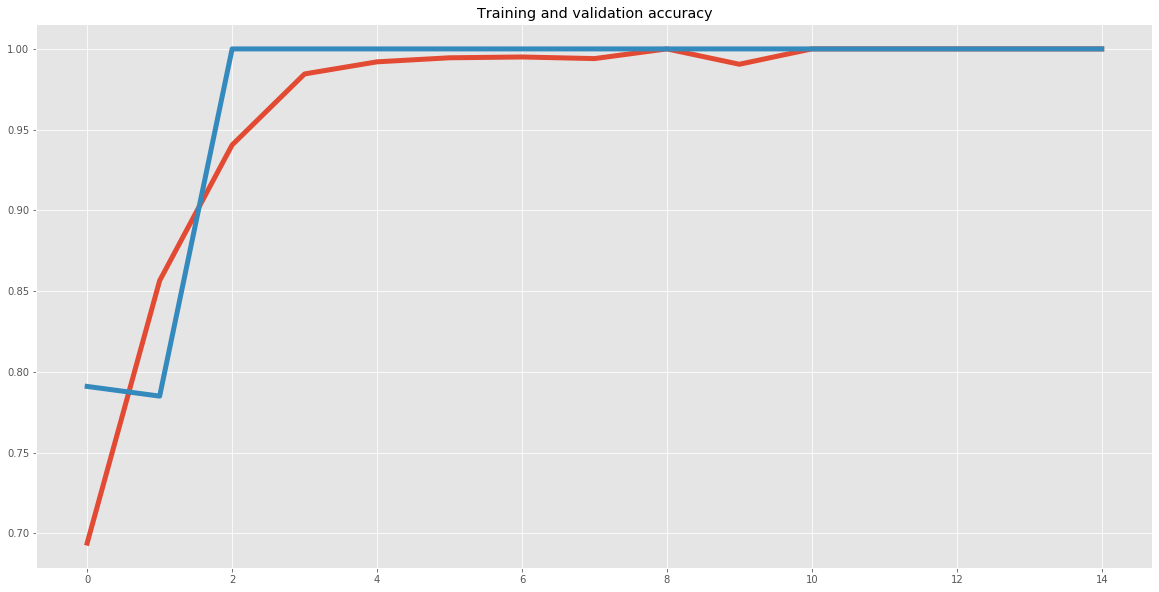

In [39]:
plt.figure(figsize=(20,10))
plt.style.use('ggplot')
plt.plot ( epochs, acc,linewidth=5 )
plt.plot ( epochs, val_acc,linewidth=5 )
plt.title ('Training and validation accuracy')

Text(0.5, 1.0, 'Training and validation loss')

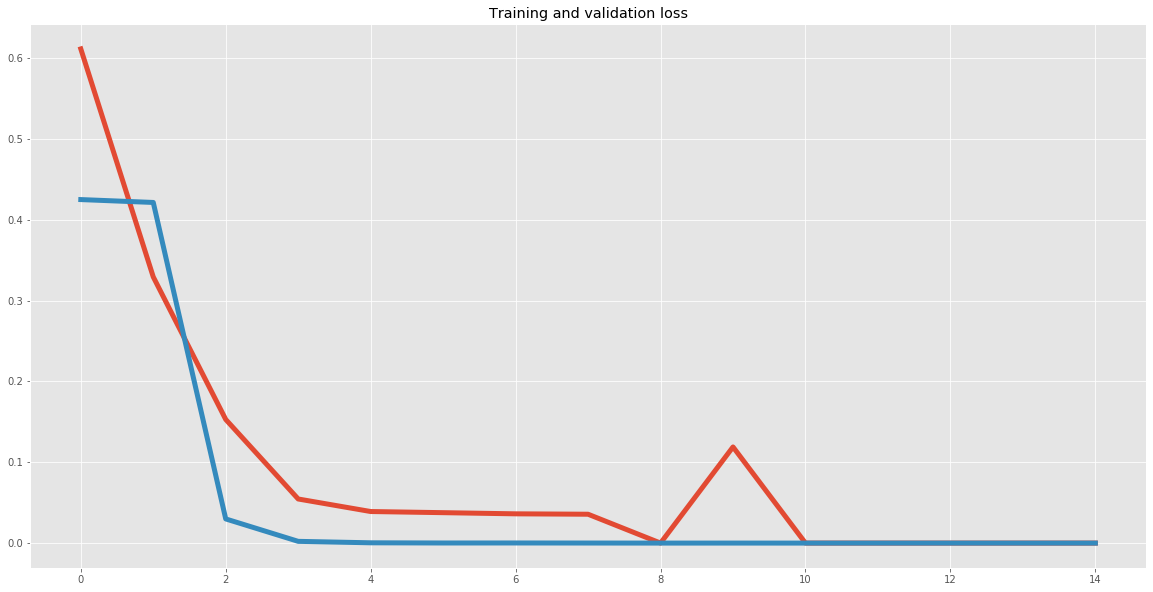

In [40]:
plt.figure(figsize=(20,10))
plt.plot ( epochs, loss,linewidth=5 )
plt.plot ( epochs, val_loss,linewidth=5 )
plt.title ('Training and validation loss')

In [ ]:
#os.kill(os.getpid(),signal.SIGKILL)